In [1]:
import types
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy import stats
import math
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
df_onepiece = pd.read_csv('ONE PIECE.csv')
display(df_onepiece)

,Unnamed: 0,rank,trend,season,episode,name,start,total_votes,average_rating
0,0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,3,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,4,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5
...,...,...,...,...,...,...,...,...,...
953,953,"41,448",26,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
954,954,"35,342",44,1,955,&quot;A New Alliance?! Kaido's Army Gathers&quot;,2020,407,7.4
955,955,"33,715",75,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2
956,956,"2,940",964,1,957,Big News! The Warlords Attack Incident,2021,"2,862",9.1


In [3]:
ratings=pd.read_csv("rating.csv")#load dataframes
trends=pd.read_csv("trends.csv")

<AxesSubplot:xlabel='Month', ylabel='One Piece: (Worldwide)'>

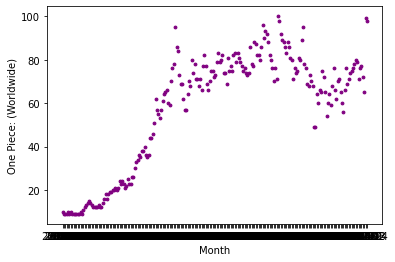

In [4]:
trends.plot.scatter(x="Month",y="One Piece: (Worldwide)",color = "purple", s=8)# Scatter plot of episodes rating by when they came out 

Text(0.5, 0, 'Average Rating')

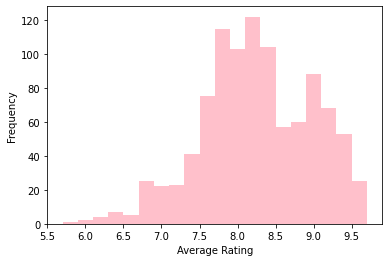

In [5]:
ratings["average_rating"].plot.hist(color="pink",bins=20)#Average Rating in a frequncy histogram
plt.xlabel("Average Rating")

In [6]:
dfnew=ratings.groupby("date").agg("mean").reset_index()# Finding the mean rating of every year
dfnew.drop(["season","episode"],axis=1,inplace=True)
dfnew

,date,average_rating
0,1999,7.850000
1,2000,7.870455
2,2001,7.719048
3,2002,7.895455
4,2003,7.772973
5,2004,7.935897
6,2005,7.953846
7,2006,8.073684
8,2007,7.853333
9,2008,8.004255


In [7]:
season = df_onepiece['start']
df_onepiece.head() #showing first five episodes 

,Unnamed: 0,rank,trend,season,episode,name,start,total_votes,average_rating
0,0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,3,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,4,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5


In [8]:
x = df_onepiece.groupby('start', as_index=False ,sort=False)['episode'].count()
x #showing numbers of episodes per year 

,start,episode
0,1999,8
1,2000,44
2,2001,42
3,2002,44
4,2003,37
5,2004,39
6,2005,39
7,2006,38
8,2007,45
9,2008,47


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ONE PIECE EPISODES PER YEAR')

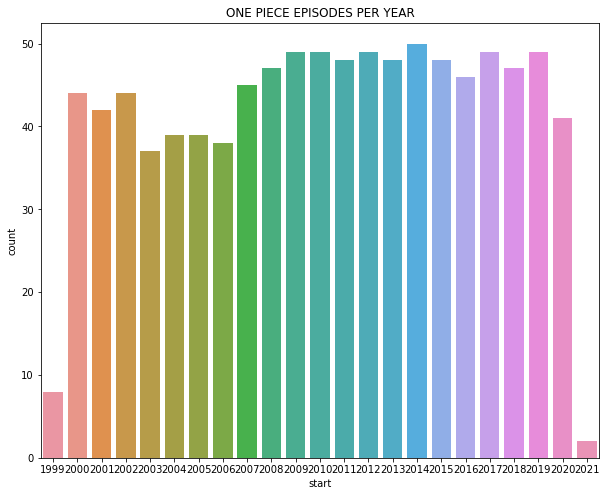

In [9]:
plt.figure(figsize=(10,8))
p = sns.countplot(df_onepiece['start'])
plt.title("ONE PIECE EPISODES PER YEAR") #showing numbers of episodes per year as a countplot

Text(0.5, 1.0, 'Plot of episodes per year')

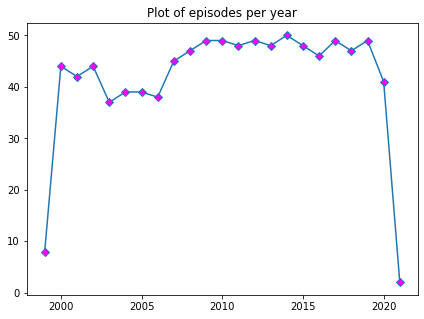

In [10]:
plt.figure(figsize=(7,5))
plt.plot(x['start'],x['episode'] , marker = "D", markerfacecolor='magenta')
plt.title("Plot of episodes per year")  #showing numbers of episodes per year as a plot

In [11]:
mean_rating = df_onepiece.groupby('start',sort=False)['average_rating'].sum()/df_onepiece.groupby('start',sort=False)['episode'].count()
mean_rating #counting mean rating per year

start
1999    7.725000
2000    7.727273
2001    7.538095
2002    7.734091
2003    7.640541
2004    7.753846
2005    7.746154
2006    7.894737
2007    7.600000
2008    7.814894
2009    7.793878
2010    8.079592
2011    7.912500
2012    7.367347
2013    7.416667
2014    7.828000
2015    8.202083
2016    7.882609
2017    7.959184
2018    7.919149
2019    7.908163
2020    7.887805
2021    9.250000
dtype: float64

Text(0.5, 0, 'Average Rating per year')

<Figure size 1080x1800 with 0 Axes>

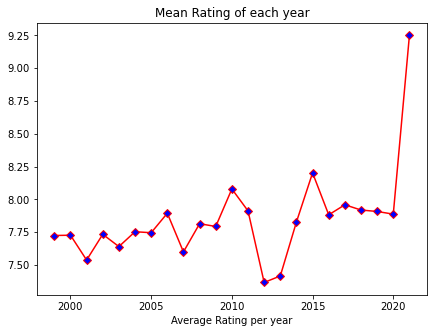

In [12]:
plt.figure(figsize=(15,25))
plt.figure(figsize=(7,5))
plt.plot(mean_rating, marker='D',color='r',markerfacecolor='blue')
plt.title("Mean Rating of each year")  
plt.xlabel("Average Rating per year") #showing mean rating of One Piece per year

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


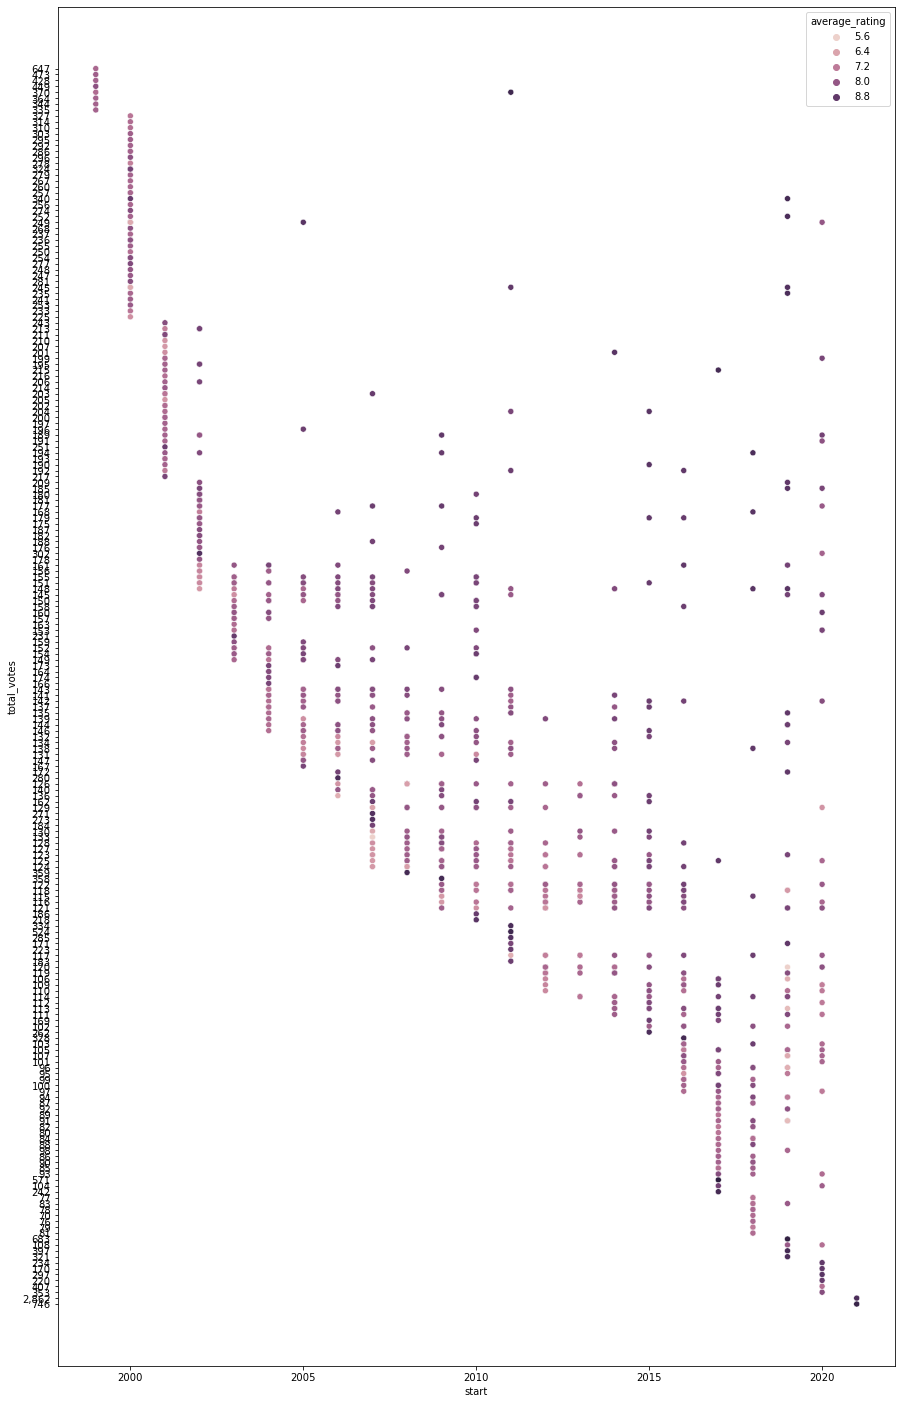

In [13]:
plt.figure(figsize=(15,25))
sns.scatterplot(df_onepiece['start'],df_onepiece['total_votes'] , hue =df_onepiece['average_rating'])
plt.show() #showing correlation between starting year of One Piece, total votes and average rating. 

In [14]:
maximumrate = max(df_onepiece.average_rating) 
minimumrate = min(df_onepiece.average_rating)
maximumrate,minimumrate #finding minimum and maximum rating of One Piece by comparing all of episodes' rating 

(9.6, 5.6)

In [15]:
df_onepiece.query(" average_rating == [9.6,5.6]") #displaying minimum and maximum rating of One Piece's episodes' names

,Unnamed: 0,rank,trend,season,episode,name,start,total_votes,average_rating
335,335,"109,201",-,1,336,Shutsudou Chopperman! Mamore Nagisa no TV-kyoku,2007,133,5.6
807,807,"18,272",58,1,808,Kanashiki Kettou: Luffy tai Sanji (Kouhen),2017,571,9.6
880,880,"116,089",5,1,881,Going into Action! The Implacable New Admiral ...,2019,120,5.6


In [16]:
max_season = df_onepiece.groupby("start" , sort = False)['average_rating'].max()
min_season = df_onepiece.groupby("start",sort =False)['average_rating'].min()

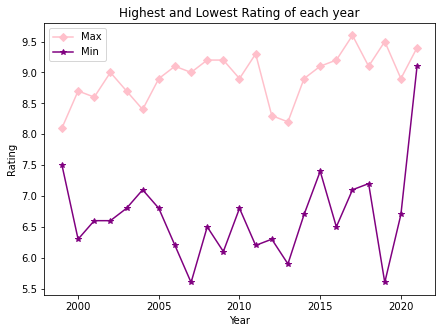

In [17]:
plt.figure(figsize=(7,5))
plt.plot(max_season,marker='D',color='pink')
plt.plot(min_season,marker='*',color='purple')
plt.title("Highest and Lowest Rating of each year")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend(["Max","Min"]) #Visualizing highest and lowest rating of each year by using plot

In [18]:
peryear_episode = df_onepiece.groupby('start',as_index=False,sort = False)['episode'].count()
seasons = [x for x in range(1999,2022)]

In [19]:
peryear_episode #showing numbers of episodes per year

,start,episode
0,1999,8
1,2000,44
2,2001,42
3,2002,44
4,2003,37
5,2004,39
6,2005,39
7,2006,38
8,2007,45
9,2008,47


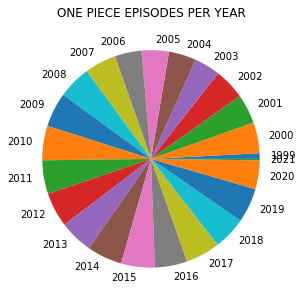

In [20]:
plt.figure(figsize=(7,5))
plt.pie(peryear_episode.episode , labels = seasons)
plt.title("ONE PIECE EPISODES PER YEAR")
plt.show() #visualizing One Piece's episodes per year by using pie 